# 1. Import Dataset

In [1]:
import pandas as pd
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. Install PyCaret

In [2]:
!pip install pycaret

     |████████████████████████████████| 188 kB 2.8 MB/s 
     |████████████████████████████████| 7.0 MB 7.2 MB/s 
     |████████████████████████████████| 81 kB 6.2 MB/s 
     |████████████████████████████████| 3.0 MB 52.2 MB/s 
     |████████████████████████████████| 259 kB 59.0 MB/s 
     |████████████████████████████████| 63.9 MB 62.5 MB/s 
     |████████████████████████████████| 7.3 MB 44.1 MB/s 
     |████████████████████████████████| 378 kB 48.1 MB/s 
     |████████████████████████████████| 142.8 MB 37 kB/s 
     |████████████████████████████████| 60 kB 4.6 MB/s 
     |████████████████████████████████| 127 kB 45.5 MB/s 
     |████████████████████████████████| 92 kB 244 kB/s 
     |████████████████████████████████| 64 kB 2.3 MB/s 
     |████████████████████████████████| 46 kB 3.1 MB/s 
     |████████████████████████████████| 6.1 MB 44.2 MB/s 
     |████████████████████████████████| 234 kB 62.2 MB/s 
     |████████████████████████████████| 2.1 MB 45.5 MB/s 
  Created wheel for cuffl

# 3. Iteration 1: Setup without Preprocessing

In [3]:
from pycaret.regression import *
reg1 = setup(train, target = 'SalePrice', session_id = 123, silent = True) #silent is set to True for unattended run during kernel execution

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1460, 81)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,58
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## 3.1 Compare Models

In [4]:
compare_models(blacklist = ['tr']) #blacklisted Thielsen Regressor due to longer training times

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,15896.6,8.03637e+08,27521.8,0.8827,0.1313,0.0926
1,Gradient Boosting Regressor,18225.3,8.62755e+08,28862.4,0.8709,0.1431,0.1063
2,Extreme Gradient Boosting,18242.1,8.66742e+08,28963.9,0.8695,0.1438,0.107
3,Light Gradient Boosting Machine,18258.1,9.62618e+08,30280.5,0.8584,0.1512,0.1079
4,Random Forest,19560.8,1.12225e+09,32638.2,0.8351,0.1596,0.1158
5,AdaBoost Regressor,26262.3,1.35967e+09,36466.2,0.7942,0.2111,0.1731
6,Lasso Least Angle Regression,17471.6,1.34561e+09,34429.2,0.7919,0.165,0.1026
7,Ridge Regression,20511.8,1.50876e+09,36631.5,0.7703,0.1957,0.1249
8,Orthogonal Matching Pursuit,18642.9,1.48601e+09,35661,0.7697,0.1645,0.1101
9,Extra Trees Regressor,22812.6,1.63841e+09,39493.9,0.7534,0.1846,0.1326


## 3.2 Create and Store Models in Variable

In [5]:
catboost = create_model('catboost', verbose = False) #verbose set to False to avoid printing score grid
gbr = create_model('gbr', verbose = False)
xgboost = create_model('xgboost', verbose = False)

## 3.3 Blend Models

In [6]:
blend_top_3 = blend_models(estimator_list = [catboost, gbr, xgboost])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,19961.4962,1.555368e+09,39438.1552,0.8100,0.1768,0.1164
1,16795.2814,7.198981e+08,26830.9170,0.8877,0.1233,0.0902
2,13260.3601,3.593057e+08,18955.3605,0.9222,0.1202,0.0868
3,15138.1882,6.243925e+08,24987.8476,0.8796,0.1309,0.0928
4,19238.3354,1.305902e+09,36137.2646,0.8672,0.1792,0.1250
5,16943.3696,8.229131e+08,28686.4624,0.8860,0.1311,0.0984
6,16726.0102,5.370227e+08,23173.7495,0.8861,0.1140,0.0930
7,18653.3367,7.870130e+08,28053.7513,0.8845,0.1425,0.1076
8,18254.4341,7.598277e+08,27564.9722,0.8866,0.1345,0.1021
9,15207.9334,5.978568e+08,24451.1107,0.8917,0.1116,0.0814


- No significant improvement after blending. Best individual model is Catboost with `0.1313` RMSLE. Blender RMSLE is `0.1364`.

## 3.4 Stack Models

In [7]:
stack1 = stack_models(estimator_list = [gbr, xgboost], meta_model = catboost, restack = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20204.6090,1.988339e+09,44590.7969,0.7571,0.1837,0.1169
1,16381.6495,6.846242e+08,26165.3249,0.8932,0.1215,0.0890
2,14451.1125,4.147400e+08,20365.1652,0.9102,0.1234,0.0916
3,15877.8822,7.110417e+08,26665.3646,0.8629,0.1404,0.0974
4,20342.0227,1.529807e+09,39112.7531,0.8444,0.1772,0.1245
5,17852.5332,1.093093e+09,33061.9582,0.8486,0.1418,0.1024
6,16812.6431,6.639510e+08,25767.2461,0.8592,0.1198,0.0917
7,18875.4063,8.490590e+08,29138.6169,0.8754,0.1480,0.1082
8,18526.6998,8.139377e+08,28529.5926,0.8785,0.1386,0.1038
9,15635.7737,5.822083e+08,24128.9926,0.8945,0.1175,0.0856


- No improvement from stacking. Best model still Catboost Regressor with default hyperparameters with RMSLE `0.1313`.

# 4. Iteration 2: Setup with Preprocessing

In [8]:
from pycaret.regression import *
reg1 = setup(train, target = 'SalePrice', session_id = 123, 
             normalize = True, normalize_method = 'zscore',
             transformation = True, transformation_method = 'yeo-johnson', transform_target = True,
             ignore_low_variance = True, combine_rare_levels = True,
             numeric_features=['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 
                               'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                               'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea'],
             silent = True #silent is set to True for unattended run during kernel execution
             )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(1460, 81)"
4,Missing Values,True
5,Numeric Features,33
6,Categorical Features,46
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## 4.1 Compare Models

In [9]:
compare_models(blacklist = ['tr']) #blacklisted Thielsen Regressor due to longer training times

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,16733.8,7.72428e+08,27231,0.8847,0.1323,0.0953
1,CatBoost Regressor,15639.9,8.44593e+08,27896.1,0.8791,0.1275,0.0891
2,Support Vector Machine,15393.9,8.97393e+08,28488.3,0.8719,0.1282,0.0874
3,Light Gradient Boosting Machine,17467.5,9.08805e+08,29319.2,0.8666,0.1403,0.0992
4,Extreme Gradient Boosting,17300.3,9.36891e+08,29647.1,0.8625,0.1364,0.0976
5,Random Forest,18987.4,1.15884e+09,33105.8,0.83,0.1521,0.1075
6,Extra Trees Regressor,18900.3,1.18108e+09,33291.5,0.8286,0.1488,0.1044
7,Orthogonal Matching Pursuit,16656,1.29507e+09,32431.9,0.8086,0.1388,0.0956
8,AdaBoost Regressor,24368.4,1.40978e+09,36991.4,0.7872,0.1807,0.1364
9,K Neighbors Regressor,21489.5,1.45955e+09,37146.9,0.7858,0.1655,0.1181


- Catboost Regressor RMSLE slightly improved from `0.1313` to `0.1275` 

## 4.2 Create and Store Models in Variable

In [10]:
gbr = create_model('gbr', verbose = False)
catboost = create_model('catboost', verbose = False)
svm = create_model('svm', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
xgboost = create_model('xgboost', verbose = False)

## 4.3 Blend Models

In [11]:
blend_top_5 = blend_models(estimator_list = [gbr,catboost,svm,lightgbm,xgboost])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18326.8314,1.431609e+09,37836.6124,0.8251,0.1615,0.1016
1,15313.3472,8.314091e+08,28834.1653,0.8703,0.1187,0.0803
2,13130.3880,3.468765e+08,18624.6215,0.9249,0.1149,0.0842
3,14084.3179,5.136570e+08,22664.0030,0.9010,0.1148,0.0818
4,18868.4802,1.627255e+09,40339.2520,0.8345,0.1672,0.1112
5,15315.9318,1.107892e+09,33285.0081,0.8465,0.1262,0.0852
6,15165.5791,4.784369e+08,21873.2004,0.8985,0.1065,0.0837
7,15739.0281,5.947321e+08,24387.1305,0.9127,0.1259,0.0901
8,16546.4420,6.607448e+08,25704.9563,0.9014,0.1236,0.0916
9,13482.5395,4.172085e+08,20425.6834,0.9244,0.1059,0.0759


- Blending top models has slightly improved RMSLE from `0.1275` to `0.1265`.

## 4.4 Stack Models

In [12]:
stack2 = stack_models(estimator_list = [gbr,catboost,lightgbm,xgboost], meta_model = svm, restack = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17409.8890,1.305815e+09,36136.0573,0.8405,0.1593,0.0985
1,14335.1123,7.003411e+08,26463.9587,0.8907,0.1165,0.0785
2,13324.0524,3.545430e+08,18829.3131,0.9232,0.1113,0.0826
3,12909.2774,4.667761e+08,21605.0009,0.9100,0.1122,0.0764
4,19690.0468,2.127673e+09,46126.7065,0.7836,0.1788,0.1133
5,16794.3541,2.024131e+09,44990.3384,0.7196,0.1552,0.0939
6,15066.6020,5.096206e+08,22574.7789,0.8919,0.1051,0.0818
7,16134.0545,7.539584e+08,27458.3035,0.8894,0.1397,0.0936
8,15065.3775,4.834227e+08,21986.8748,0.9279,0.1036,0.0823
9,15258.0220,5.286918e+08,22993.2992,0.9042,0.1128,0.0839


- No improvement after stacking.

# 5. Iteration 3: Setup with Advance Preprocessing

In [13]:
from pycaret.regression import *
reg1 = setup(train, target = 'SalePrice', session_id = 123, 
             normalize = True, normalize_method = 'zscore',
             transformation = True, transformation_method = 'yeo-johnson', transform_target = True,
             numeric_features=['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 
                               'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                               'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea'],
             ordinal_features= {'ExterQual': ['Fa', 'TA', 'Gd', 'Ex'],
                                'ExterCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'BsmtQual' : ['Fa', 'TA', 'Gd', 'Ex'], 
                                'BsmtCond' : ['Po', 'Fa', 'TA', 'Gd'],
                                'BsmtExposure' : ['No', 'Mn', 'Av', 'Gd'],
                                'HeatingQC' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'KitchenQual' : ['Fa', 'TA', 'Gd', 'Ex'],
                                'FireplaceQu' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'GarageQual' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'GarageCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'PoolQC' : ['Fa', 'Gd', 'Ex']},
             polynomial_features = True, trigonometry_features = True, remove_outliers = True, outliers_threshold = 0.01,
             silent = True #silent is set to True for unattended run during kernel execution
             )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(1460, 81)"
4,Missing Values,True
5,Numeric Features,33
6,Categorical Features,46
7,Ordinal Features,True
8,High Cardinality Features,False
9,High Cardinality Method,None


## 5.1 Compare Models

In [14]:
compare_models(blacklist = ['tr']) #blacklisted Thielsen Regressor due to longer training times

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,14903.5,8.78698e+08,27512.8,0.8489,0.1248,0.0855
1,Huber Regressor,13579.6,7.35629e+08,24203.5,0.8486,0.1235,0.0836
2,Orthogonal Matching Pursuit,15423.1,8.59547e+08,27827.3,0.8456,0.1287,0.088
3,Bayesian Ridge,14759.1,8.30011e+08,26499.7,0.8428,0.1232,0.0856
4,Ridge Regression,14790.8,8.11028e+08,26263.6,0.8413,0.1267,0.0876
5,Light Gradient Boosting Machine,16810.8,9.39723e+08,29438.2,0.8389,0.1373,0.0957
6,Extra Trees Regressor,17938,1.03175e+09,31191.7,0.8219,0.1461,0.1024
7,Random Forest,17953.5,1.05049e+09,31534.8,0.8212,0.1453,0.1023
8,Gradient Boosting Regressor,16335.5,9.78845e+08,29102.9,0.8206,0.1335,0.0939
9,Extreme Gradient Boosting,16500.9,1.05235e+09,30059.8,0.8205,0.1345,0.0942


## 5.2 Tune Models

In [15]:
huber = tune_model('huber', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13498.0328,3.786105e+08,19457.9170,0.9226,0.1218,0.0825
1,14372.7724,4.232725e+08,20573.5878,0.9619,0.1356,0.0958
2,15128.1410,6.302112e+08,25104.0082,0.8634,0.1625,0.1052
3,11517.8009,2.345910e+08,15316.3631,0.9255,0.0964,0.0743
4,14609.1411,5.035843e+08,22440.6840,0.9455,0.1122,0.0800
5,15891.0790,3.447466e+09,58715.1248,0.1573,0.1668,0.0931
6,12780.4967,4.629581e+08,21516.4616,0.9305,0.1131,0.0756
7,12279.9130,3.604687e+08,18986.0137,0.9465,0.1077,0.0753
8,11766.8365,2.961185e+08,17208.0926,0.9597,0.0869,0.0615
9,14755.8248,4.625474e+08,21506.9142,0.9106,0.1251,0.0949


In [16]:
omp = tune_model('omp', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14075.6558,4.339981e+08,20832.6218,0.9113,0.1304,0.0866
1,18908.8139,1.145016e+09,33838.0823,0.8969,0.1422,0.1014
2,15710.1189,6.018364e+08,24532.3546,0.8695,0.1548,0.1006
3,10975.0324,2.015912e+08,14198.2822,0.9360,0.0890,0.0687
4,16830.8527,8.373583e+08,28937.1448,0.9093,0.1053,0.0792
5,17717.1226,3.042673e+09,55160.4295,0.2563,0.1655,0.1008
6,13922.0864,6.024009e+08,24543.8567,0.9096,0.1157,0.0800
7,13759.4682,4.579465e+08,21399.6843,0.9320,0.1120,0.0829
8,15740.0834,5.646112e+08,23761.5485,0.9233,0.1059,0.0781
9,14135.6158,3.848431e+08,19617.4187,0.9256,0.1202,0.0911


In [17]:
ridge = tune_model('ridge', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15050.9981,4.894199e+08,22122.8357,0.9000,0.1305,0.0894
1,16961.0036,6.838990e+08,26151.4631,0.9384,0.1316,0.0977
2,15726.5963,5.450161e+08,23345.5792,0.8819,0.1455,0.1017
3,11163.7203,2.114547e+08,14541.4809,0.9329,0.0921,0.0695
4,17734.4217,1.225972e+09,35013.8863,0.8672,0.1172,0.0857
5,15856.0129,1.872290e+09,43269.9669,0.5423,0.1498,0.0925
6,14890.0665,7.092271e+08,26631.3184,0.8935,0.1263,0.0848
7,15318.9889,1.015730e+09,31870.5136,0.8493,0.1406,0.0855
8,15318.0569,5.009207e+08,22381.2585,0.9319,0.0996,0.0749
9,15424.6054,4.674996e+08,21621.7395,0.9096,0.1224,0.0966


In [18]:
br = tune_model('br', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13976.3628,4.333965e+08,20818.1773,0.9114,0.1247,0.0836
1,16758.2894,9.058793e+08,30097.8285,0.9185,0.1292,0.0931
2,15465.8235,5.969941e+08,24433.4624,0.8706,0.1581,0.1039
3,11245.8841,2.094682e+08,14473.0164,0.9335,0.0881,0.0697
4,17201.9146,9.492806e+08,30810.3972,0.8972,0.1104,0.0822
5,16847.3120,3.314685e+09,57573.2973,0.1898,0.1666,0.0970
6,13434.4075,5.560883e+08,23581.5247,0.9165,0.1244,0.0808
7,12929.2747,4.456171e+08,21109.6441,0.9339,0.1089,0.0778
8,14609.0746,4.527242e+08,21277.3174,0.9385,0.0990,0.0741
9,14908.0689,4.170724e+08,20422.3497,0.9194,0.1214,0.0937


In [19]:
lightgbm = tune_model('lightgbm', n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16895.2552,6.716274e+08,25915.7755,0.8627,0.1427,0.0999
1,19393.7240,1.627986e+09,40348.3054,0.8534,0.1580,0.1029
2,18120.7828,6.720559e+08,25924.0414,0.8543,0.1589,0.1166
3,12922.8567,3.082360e+08,17556.6517,0.9021,0.1068,0.0788
4,19176.3628,1.723235e+09,41511.8604,0.8134,0.1302,0.0867
5,17220.6111,1.780241e+09,42192.9048,0.5648,0.1575,0.0999
6,14668.8595,6.158294e+08,24815.9109,0.9076,0.1372,0.0893
7,15844.6880,6.695658e+08,25875.9693,0.9006,0.1337,0.0964
8,16923.9801,7.386557e+08,27178.2209,0.8996,0.1197,0.0862
9,17076.0399,5.896434e+08,24282.5742,0.8860,0.1330,0.1037


In [20]:
par = tune_model('par', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,19451.1817,6.517765e+08,25529.9143,0.8668,0.1422,0.1136
1,17448.4809,6.782191e+08,26042.6408,0.9389,0.1419,0.1067
2,20300.9924,9.109428e+08,30181.8289,0.8025,0.1851,0.1319
3,11701.4347,2.474870e+08,15731.7198,0.9214,0.0950,0.0744
4,16950.9793,6.952615e+08,26367.8126,0.9247,0.1198,0.0897
5,18668.4178,2.810641e+09,53015.4772,0.3130,0.1690,0.1071
6,15563.2449,5.480239e+08,23409.9108,0.9177,0.1259,0.0911
7,15942.5503,4.617375e+08,21488.0778,0.9315,0.1294,0.0971
8,17690.9310,5.453934e+08,23353.6588,0.9259,0.1136,0.0937
9,17362.7782,6.384593e+08,25267.7523,0.8766,0.1411,0.1104


## 5.3 Blend Models

In [21]:
blend_all = blend_models(estimator_list = [huber, omp, ridge, br])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13579.3892,4.032133e+08,20080.1718,0.9176,0.1238,0.0822
1,15705.8602,6.870236e+08,26211.1343,0.9382,0.1279,0.0918
2,14687.2054,5.499336e+08,23450.6631,0.8808,0.1508,0.0986
3,10680.8191,1.862903e+08,13648.8212,0.9409,0.0854,0.0671
4,16333.2187,7.935038e+08,28169.1996,0.9141,0.1065,0.0797
5,15770.5584,2.801441e+09,52928.6447,0.3152,0.1586,0.0910
6,13301.0841,5.547586e+08,23553.3148,0.9167,0.1167,0.0773
7,12772.2291,4.666873e+08,21602.9462,0.9308,0.1079,0.0757
8,13338.5428,4.044251e+08,20110.3234,0.9450,0.0909,0.0662
9,14205.3143,4.036219e+08,20090.3424,0.9220,0.1185,0.0908


## 5.4 Evaluate Bayesian Ridge Model

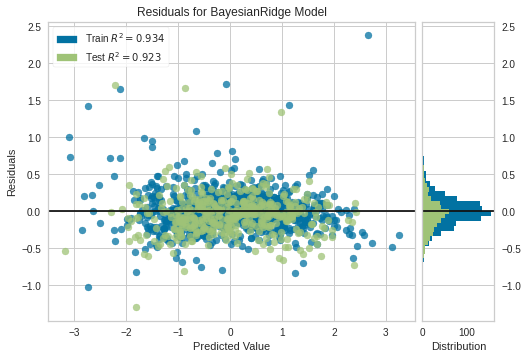

In [22]:
plot_model(br, plot = 'residuals')

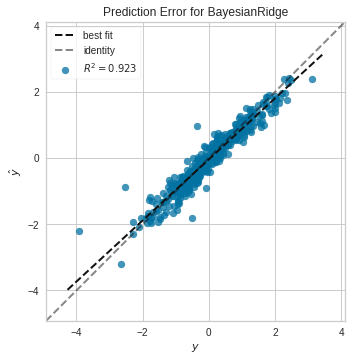

In [23]:
plot_model(br, plot = 'error')

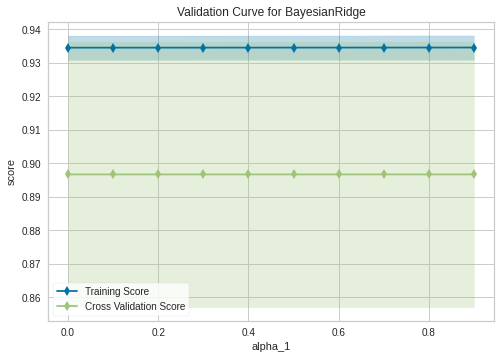

In [24]:
plot_model(br, plot = 'vc')

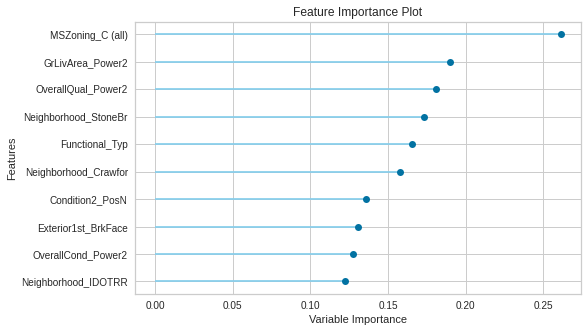

In [25]:
plot_model(br, plot = 'feature')

## 5.5 Interpret LightGBM Model

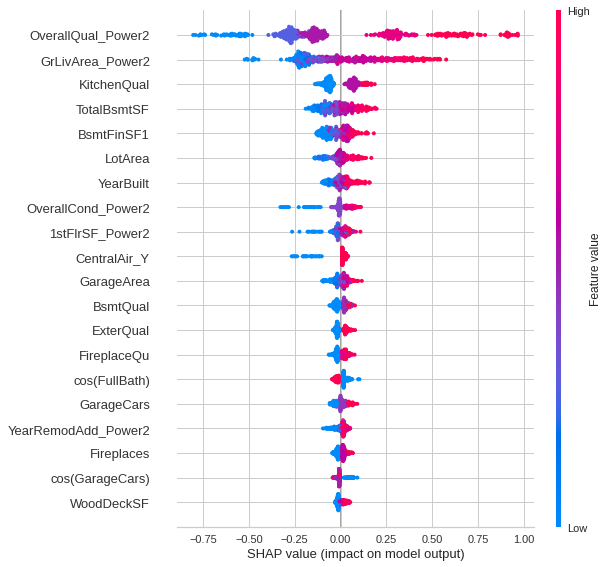

In [26]:
interpret_model(lightgbm)

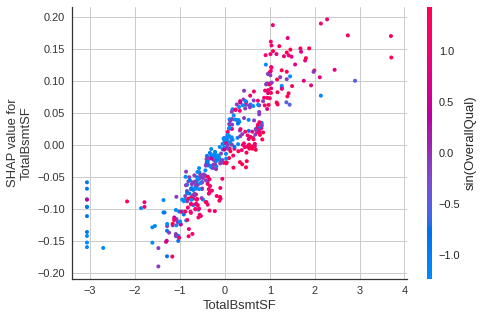

In [27]:
interpret_model(lightgbm, plot = 'correlation', feature = 'TotalBsmtSF')

In [28]:
interpret_model(lightgbm, plot = 'reason', observation = 0)

# 6. Finalize Blender and Predict test dataset

In [29]:
# check predictions on hold-out
predict_model(blend_all);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,13530.1052,4.449803e+08,21094.5565,0.9268,0.1072,0.0747


- RMSLE on hold-out is `0.1061` vs. 10 fold CV is `0.1180`.

In [30]:
final_blender = finalize_model(blend_all)
print(final_blender)

VotingRegressor(estimators=[('Huber Regressor_0',
                             HuberRegressor(alpha=0.5869, epsilon=1.55,
                                            fit_intercept=True, max_iter=100,
                                            tol=1e-05, warm_start=False)),
                            ('Orthogonal Matching Pursuit_1',
                             OrthogonalMatchingPursuit(fit_intercept=True,
                                                       n_nonzero_coefs=78,
                                                       normalize=False,
                                                       precompute='auto',
                                                       tol=None)),
                            ('Ridge_2',
                             Ridge(alpha=0.336, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=True,
                                   random_state=123, solver='auto',
                                   tol=0.001)

In [31]:
predictions = predict_model(final_blender, data = test)
predictions.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,122664.9116
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,160301.5086
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,186283.7094
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,199598.1946
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,195325.7252


## END OF NOTEBOOK - THANK YOU.